# 연습문제 02 풀이

In [28]:
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

In [2]:
origin = read_excel("../../pima-indians.xlsx")

print(origin.info())

origin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 03. 데이터 전처리
### 결측치 확인

In [3]:
origin.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### 명목형 변수 형변환

In [4]:
origin['Outcome'] = origin['Outcome'].astype('category')
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


### 04. 탐색적 데이터 분석
#### 기본통계 확인

In [5]:
origin.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


#### 상자그림

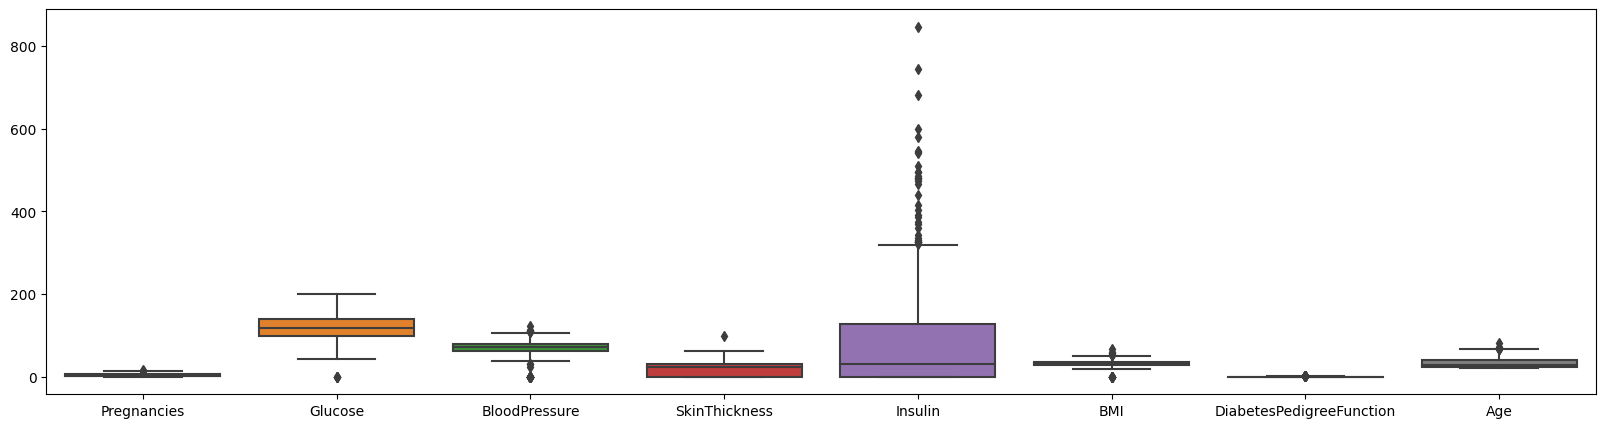

In [6]:
plt.figure(figsize=(20,5))
sb.boxplot(data= origin)
plt.show()
plt.close()

> 데이터 분포가 서로 상이하므로 표준화가 필요하다고 판단



### 05. 데이터셋 분할하기
#### 랜덤시드 고정

In [7]:
np.random.seed(777)


#### 훈련 데이터(독립변수)와 레이블(종속변수) 구분하기

In [9]:
x = origin.drop("Outcome", axis =1)
y = origin[['Outcome']]
print(x.shape, y.shape)
y

(768, 8) (768, 1)


,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


#### 데이터 표준화


In [10]:
x_scaller = StandardScaler()
x_scale = x_scaller.fit_transform(x)
x_scale_df = DataFrame(x_scale, columns=x.columns, index=x.index)
x_scale_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


#### 훈련 데이터와 검증 데이터로 분할

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_scale_df, y, test_size=0.3, random_state=777)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
x_train

(537, 8) (231, 8) (537, 1) (231, 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
335,-1.141852,1.380375,0.356432,1.409094,1.521248,2.018958,-0.642912,-0.616111
130,0.046014,1.630752,0.046245,-0.410019,0.765836,-0.290972,-0.334860,-0.020496
255,-0.844885,-0.247076,-0.263941,0.907270,-0.692891,0.204013,0.214802,-1.041549
573,-0.547919,-0.716533,-0.470732,-0.221835,0.349057,0.343624,-0.827139,-0.956462
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
...,...,...,...,...,...,...,...,...
669,1.530847,1.036107,0.459827,0.593630,0.175399,-0.138669,-0.929823,1.000557
71,0.342981,0.566649,-0.263941,0.907270,0.522715,-0.430583,-0.183854,-0.616111
599,-0.844885,-0.372265,-1.608083,-0.159107,0.349057,-1.128639,-0.195934,-0.616111
571,-0.547919,0.284975,1.390387,-1.288212,-0.692891,-1.192099,-0.615731,-1.041549


### 06. 모델 개발
#### 모델 정의

In [14]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(len(x_train.columns), )))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                288       
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 학습하기

In [15]:
result = model.fit(x_train, y_train, epochs = 500, validation_data = (x_test, y_test), callbacks = [
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)
])


Epoch 1/500


17/17 [==============================] - 0s 10ms/step - loss: 0.7700 - acc: 0.5084 - val_loss: 0.6932 - val_acc: 0.5584 - lr: 0.0010
Epoch 2/500
17/17 [==============================] - 0s 3ms/step - loss: 0.7053 - acc: 0.5810 - val_loss: 0.6489 - val_acc: 0.6104 - lr: 0.0010
Epoch 3/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6627 - acc: 0.6238 - val_loss: 0.6166 - val_acc: 0.6580 - lr: 0.0010
Epoch 4/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6287 - acc: 0.6536 - val_loss: 0.5890 - val_acc: 0.6753 - lr: 0.0010
Epoch 5/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5999 - acc: 0.6629 - val_loss: 0.5675 - val_acc: 0.7100 - lr: 0.0010
Epoch 6/500
17/17 [==============================] - 0s 3ms/step - loss: 0.5767 - acc: 0.6816 - val_loss: 0.5500 - val_acc: 0.7316 - lr: 0.0010
Epoch 7/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5568 - acc: 0.6983 - val_loss: 0.5350 - val_acc: 0.7316 - lr: 0.0010
Epo

### 07. 학습 결과 평가


In [16]:
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace = True)
result_df

,loss,acc,val_loss,val_acc,lr
epochs,,,,,
1,0.769984,0.508380,0.693200,0.558442,0.0010
2,0.705312,0.581006,0.648929,0.610390,0.0010
3,0.662671,0.623836,0.616561,0.658009,0.0010
4,0.628728,0.653631,0.589044,0.675325,0.0010
5,0.599929,0.662942,0.567466,0.709957,0.0010
6,0.576681,0.681564,0.549970,0.731602,0.0010
7,0.556766,0.698324,0.535018,0.731602,0.0010
8,0.539720,0.707635,0.523898,0.748918,0.0010
9,0.524518,0.715084,0.512347,0.774892,0.0010


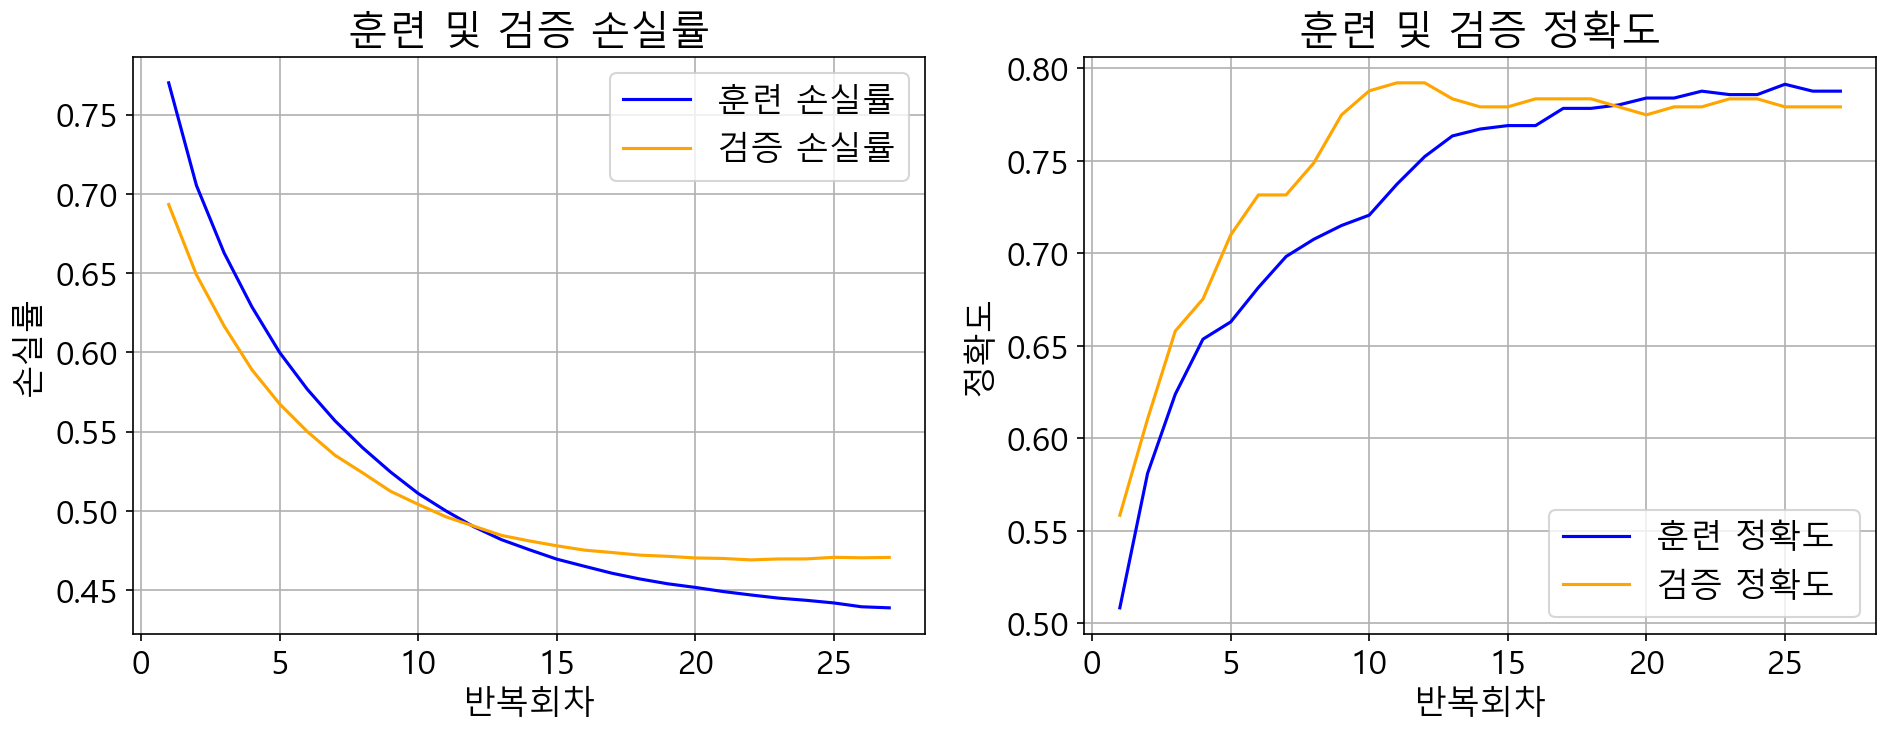

In [20]:
# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sb.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 정확도 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='acc', data=result_df, color = 'blue', label = '훈련 정확도 ', ax=ax2)
sb.lineplot(x=result_df.index, y='val_acc', data=result_df, color = 'orange', label = '검증 정확도', ax=ax2)
ax2.set_title('훈련 및 검증 정확도')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()


In [21]:
evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 정확도: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 정확도: %f" % (evaluate2[0], evaluate2[1]))


17/17 [==============================] - 0s 876us/step - loss: 0.4372 - acc: 0.7896
최종 훈련 손실률: 0.437204, 최종 훈련 정확도: 0.789572
8/8 [==============================] - 0s 1ms/step - loss: 0.4705 - acc: 0.7792
최종 검증 손실률: 0.470541, 최종 검증 정확도: 0.779221


### 08. 학습 결과 적용
#### 테스트 데이터에 대한 예측 결과 산정

In [22]:
train_pred = model.predict(x_train)
data_count, case_count = train_pred.shape
print("%d개의 훈련 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
print(train_pred)

17/17 [==============================] - 0s 658us/step
537개의 훈련 데이터가 1개의 경우의 수를 갖는다.
[[0.7736018 ]
 [0.7731376 ]
 [0.12964311]
 [0.08985125]
 [0.26596412]
 [0.05589772]
 [0.23894113]
 [0.30071634]
 [0.5641399 ]
 [0.20875324]
 [0.51463705]
 [0.29230654]
 [0.35122532]
 [0.0016862 ]
 [0.77917016]
 [0.36292902]
 [0.11370156]
 [0.54717696]
 [0.04324568]
 [0.13366964]
 [0.13473426]
 [0.2271312 ]
 [0.309469  ]
 [0.2715739 ]
 [0.18998054]
 [0.12777613]
 [0.1767864 ]
 [0.0250633 ]
 [0.39205185]
 [0.04439234]
 [0.22499004]
 [0.15005426]
 [0.15373732]
 [0.5777194 ]
 [0.8767834 ]
 [0.6742817 ]
 [0.03902751]
 [0.2779405 ]
 [0.38980016]
 [0.2775419 ]
 [0.28182247]
 [0.12370726]
 [0.02826472]
 [0.32495534]
 [0.03534268]
 [0.525153  ]
 [0.633082  ]
 [0.6210142 ]
 [0.09804525]
 [0.49064702]
 [0.06184774]
 [0.03775397]
 [0.18195976]
 [0.63844264]
 [0.11845663]
 [0.74573743]
 [0.13217887]
 [0.76136565]
 [0.33008587]
 [0.37223887]
 [0.07594964]
 [0.8882269 ]
 [0.19619758]
 [0.728631  ]
 [0.13049692]
 [0.4

In [23]:
train_df = DataFrame({
    '관측치': y_train['Outcome'],
    '예측치': np.round(train_pred.flatten())
})

train_df


,관측치,예측치
335,0,1.0
130,1,1.0
255,1,0.0
573,0,0.0
764,0,0.0
...,...,...
669,0,1.0
71,0,0.0
599,0,0.0
571,0,0.0


#### 검증 데이터에 대한 예측 결과 산정

In [24]:
test_pred = model.predict(x_test)
data_count, case_count = test_pred.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
print(test_pred)


8/8 [==============================] - 0s 714us/step
231개의 검증 데이터가 1개의 경우의 수를 갖는다.
[[0.42089576]
 [0.93877625]
 [0.8977945 ]
 [0.14313062]
 [0.46054596]
 [0.63844305]
 [0.5839195 ]
 [0.11296055]
 [0.9639154 ]
 [0.11313773]
 [0.05671834]
 [0.14179549]
 [0.02758836]
 [0.06297179]
 [0.32825837]
 [0.12388347]
 [0.08246635]
 [0.30251572]
 [0.78258127]
 [0.1909451 ]
 [0.10819839]
 [0.3629099 ]
 [0.86540985]
 [0.80063605]
 [0.12290496]
 [0.20030123]
 [0.05057254]
 [0.671754  ]
 [0.05248348]
 [0.565901  ]
 [0.12692767]
 [0.09095351]
 [0.26479208]
 [0.03100809]
 [0.18797404]
 [0.0333866 ]
 [0.23105936]
 [0.11685288]
 [0.6852196 ]
 [0.01576942]
 [0.14086275]
 [0.27135217]
 [0.05913559]
 [0.907236  ]
 [0.7259206 ]
 [0.01651289]
 [0.24340601]
 [0.22388572]
 [0.05103681]
 [0.1433552 ]
 [0.74498713]
 [0.09472287]
 [0.018771  ]
 [0.34281272]
 [0.3239515 ]
 [0.10767173]
 [0.04302246]
 [0.9426194 ]
 [0.64368606]
 [0.8537523 ]
 [0.37577057]
 [0.7990686 ]
 [0.8555509 ]
 [0.7397117 ]
 [0.32061017]
 [0.083

#### 결과 데이터 셋 구성

In [25]:
test_df = DataFrame({
    '관측치': y_test['Outcome'],
    '예측치': np.round(test_pred.flatten())
})

test_df


,관측치,예측치
387,1,0.0
43,1,1.0
408,1,1.0
262,0,0.0
533,0,0.0
...,...,...
46,0,0.0
290,0,0.0
418,0,0.0
434,0,0.0


#### 결과 확인

In [29]:
pred_bool = model.predict(x_test).flatten()
threshold = 0.5
pred = (pred_bool >= threshold).astype(int)
cm = confusion_matrix(y_test, pred)
tn, fp, fn, tp = cm.ravel()
cmdf = DataFrame([ [ tp , fn ], [fp, tn]], index =[["Predicted Values","Predicted Values"],['Positive', "Negative"]], columns = [["Actual Values","Actual Values"],["Positive", "Negative"]])
cmdf

8/8 [==============================] - 0s 857us/step


Actual Values         
                               Positive Negative
Predicted Values Positive            42       30
                 Negative            21      138

In [30]:
# RAS
ras = roc_auc_score(y_test, pred)

# 위양성율, 재현율, 임계값(사용안함)
fpr, tpr, thresholds = roc_curve(y_test, pred)

# 정확도
acc = accuracy_score(y_test, pred)

# 정밀도
pre = precision_score(y_test, pred)

# 재현율
recall = recall_score(y_test, pred)

# F1 score
f1 = f1_score(y_test, pred)

# 위양성율
fallout = fp / (fp + tn)

# 특이성
spe = 1 - fallout

result_df = DataFrame({'정확도(Accuracy)':[acc], '정밀도(Precision)':[pre], '재현율(Recall, TPR)':[recall], '위양성율(Fallout, FPR)': [fallout], '특이성(Specificity, TNR)':[spe], 'RAS': [ras], 'f1_score':[f1]})  
result_df

,정확도(Accuracy),정밀도(Precision),"재현율(Recall, TPR)","위양성율(Fallout, FPR)","특이성(Specificity, TNR)",RAS,f1_score
0,0.779221,0.666667,0.583333,0.132075,0.867925,0.725629,0.622222
